# Initialization

Importing the libraries and the data

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
import warnings

%matplotlib inline

In [2]:
sldf = pd.read_csv('../data/spectral_library.csv')
metadf = pd.read_csv('../data/sample_list_v2.csv')

Setting wavelength to dataframe index

In [3]:
sldf.set_index('Wvl',inplace = True)

# Plotting Asco

Taking only the asco mean columns

In [4]:
ascodf = sldf.filter(regex = 'sco\d*\w*_mean')

Splitting out each site

In [5]:
basinascodf = ascodf.filter(regex = 'Basin')
pem1ascodf = ascodf.filter(regex = 'Pemaquid_')
bigelowascodf = ascodf.filter(regex = 'Bigelow')

<Figure size 432x288 with 0 Axes>

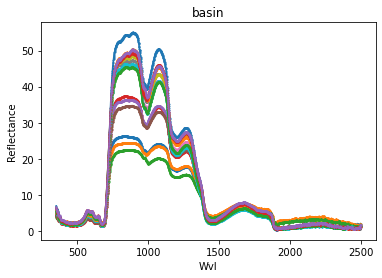

<Figure size 432x288 with 0 Axes>

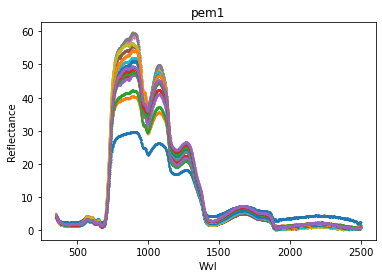

<Figure size 432x288 with 0 Axes>

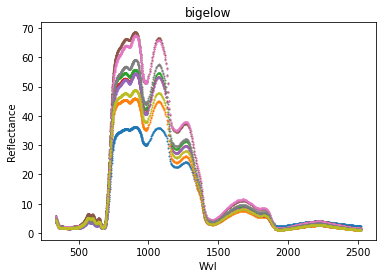

In [6]:
dfs = {'basin' : basinascodf, 'pem1' : pem1ascodf, 'bigelow' : bigelowascodf}

for dkey, dvalue in dfs.items():
    plt.figure()
    dvalue.plot(legend = False,marker = '.',ms=2)
    plt.title(dkey)
    plt.ylabel('Reflectance')

## With legend

<AxesSubplot:xlabel='Wvl'>

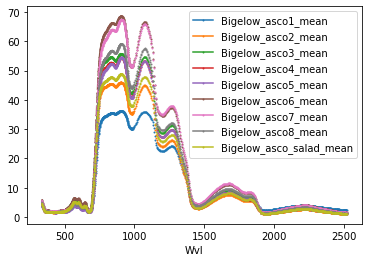

In [7]:
bigelowascodf.plot(marker = '.',ms=2)

## Splitting down more

### Basin

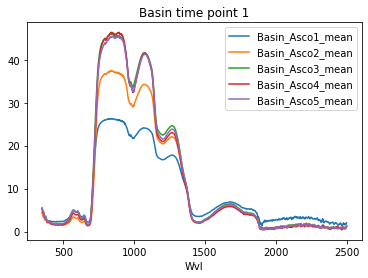

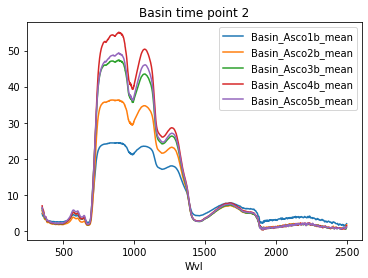

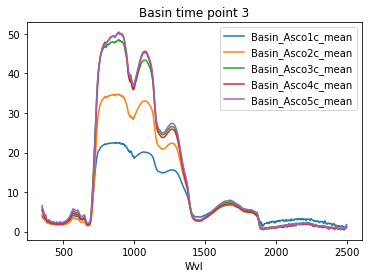

In [8]:
regexes = {'time point 1' : '\d_', 'time point 2' : '\db_', 'time point 3' :'\dc_'}

for key, rgs in regexes.items():
    subdf = basinascodf.filter(regex = rgs)
    subdf.plot()
    plt.title('Basin ' + key)

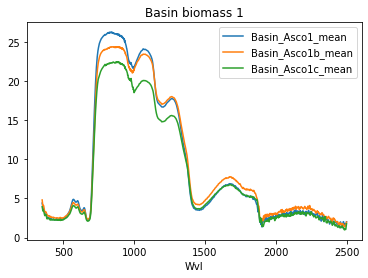

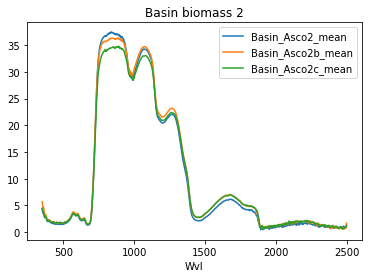

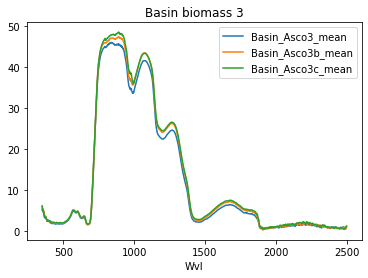

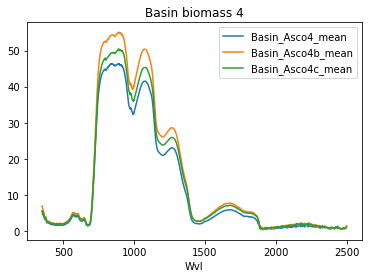

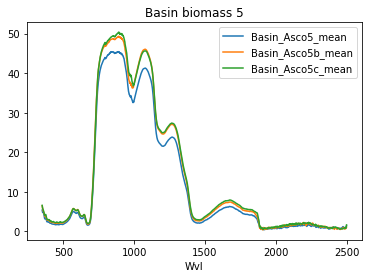

In [9]:
for rgs in range(1,6):
    subdf = basinascodf.filter(regex = str(rgs))
    subdf.plot()
    plt.title('Basin biomass ' + str(rgs))

### Pemaquid 1

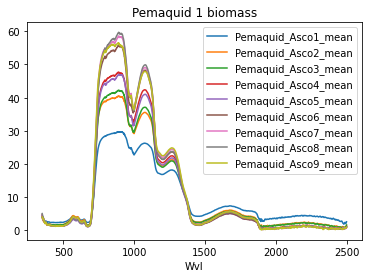

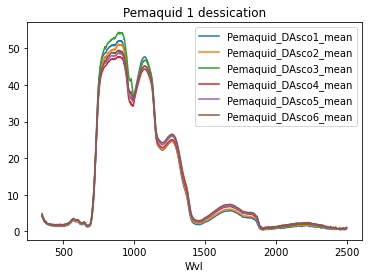

In [10]:
regexes = {'biomass' : '_Asco', 'dessication' : '_DAsco'}

for key, rgs in regexes.items():
    subdf = pem1ascodf.filter(regex = rgs)
    subdf.plot()
    plt.title('Pemaquid 1 ' + key)

# Plotting Fucus

Taking only the fucus mean columns

In [11]:
fucusdf = sldf.filter(regex = 'ucus\d*\w*_mean')

Splitting out each site

In [12]:
basinfucusdf = fucusdf.filter(regex = 'Basin')
pem1fucusdf = fucusdf.filter(regex = 'Pemaquid_')
bigelowfucusdf = fucusdf.filter(regex = 'Bigelow')

<Figure size 432x288 with 0 Axes>

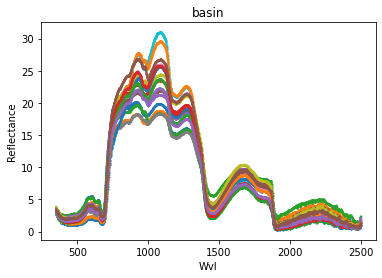

<Figure size 432x288 with 0 Axes>

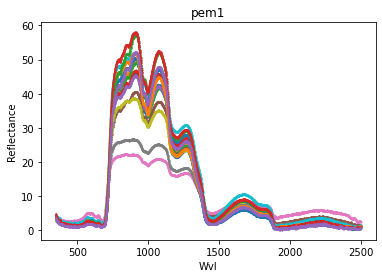

<Figure size 432x288 with 0 Axes>

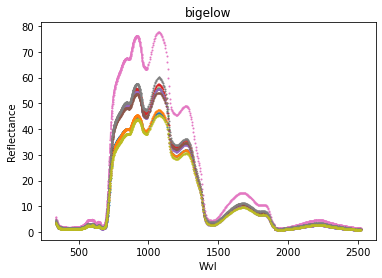

In [13]:
dfs = {'basin' : basinfucusdf, 'pem1' : pem1fucusdf, 'bigelow' : bigelowfucusdf}

for dkey, dvalue in dfs.items():
    plt.figure()
    dvalue.plot(legend = False,marker = '.',ms=2)
    plt.title(dkey)
    plt.ylabel('Reflectance')

## With legend

<AxesSubplot:xlabel='Wvl'>

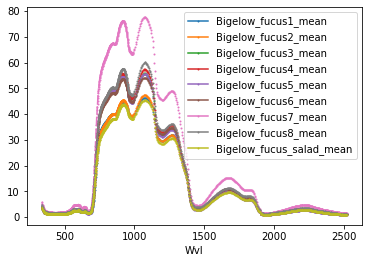

In [14]:
bigelowfucusdf.plot(marker = '.',ms=2)

## Splitting down more

### Basin

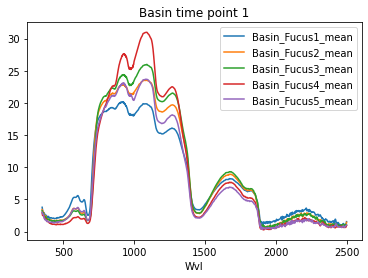

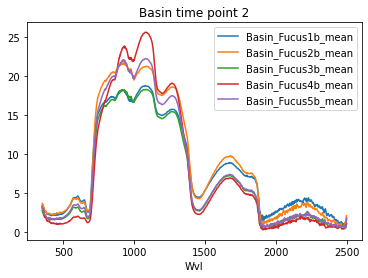

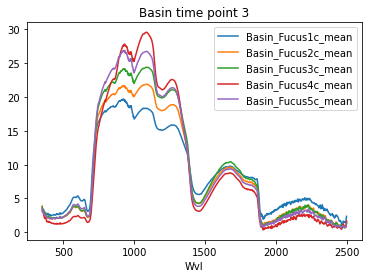

In [15]:
regexes = {'time point 1' : '\d_', 'time point 2' : '\db_', 'time point 3' :'\dc_'}

for key, rgs in regexes.items():
    subdf = basinfucusdf.filter(regex = rgs)
    subdf.plot()
    plt.title('Basin ' + key)

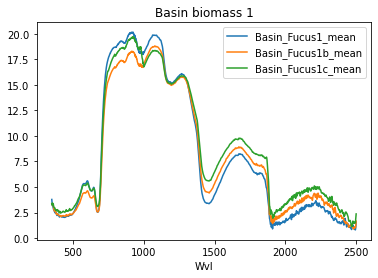

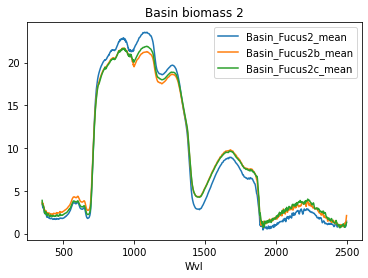

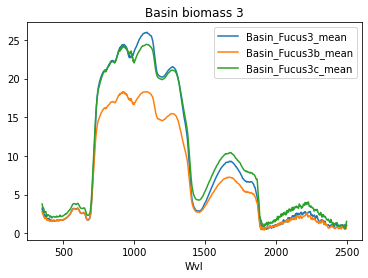

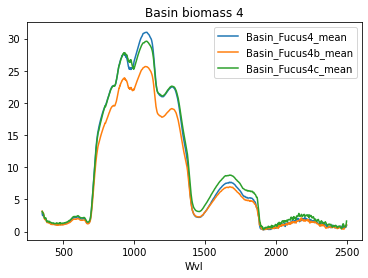

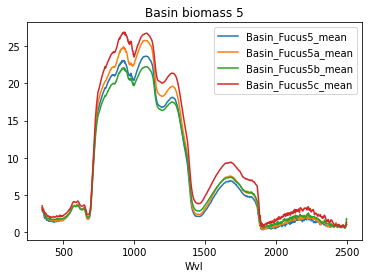

In [16]:
for rgs in range(1,6):
    subdf = basinfucusdf.filter(regex = str(rgs))
    subdf.plot()
    plt.title('Basin biomass ' + str(rgs))

### Pemaquid 1

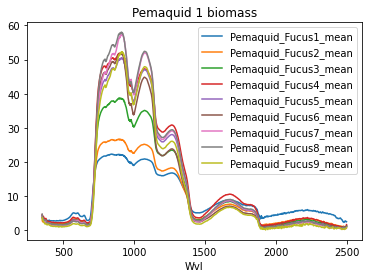

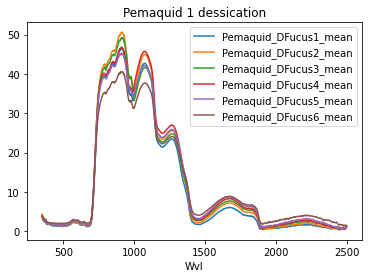

In [17]:
regexes = {'biomass' : '_Fucus', 'dessication' : '_DFucus'}

for key, rgs in regexes.items():
    subdf = pem1fucusdf.filter(regex = rgs)
    subdf.plot()
    plt.title('Pemaquid 1 ' + key)